# 비정상 데이터를 정상 데이터로 만들기

## 1. 비정상 데이터를 정상 데이터로 만들기
- 데이터가 있는 폴더 연결하기
- tsfresh 설치
- 런타임 재시작
- 필요한 라이브러리 불러오기
- 데이터 불러오기

In [37]:
# !pip install tsfresh

In [38]:
# # 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
# import os
# os.kill(os.getpid(), 9)

In [39]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# air passengers 데이터를 불러옵니다.
ap = pd.read_csv('AirPassengers.csv')

In [41]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [42]:
# 'Month' column을 삭제합니다.
ap = ap.drop('Month', axis = 1) # ap.drop("Month", axis = 1, inplace = True)

In [43]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


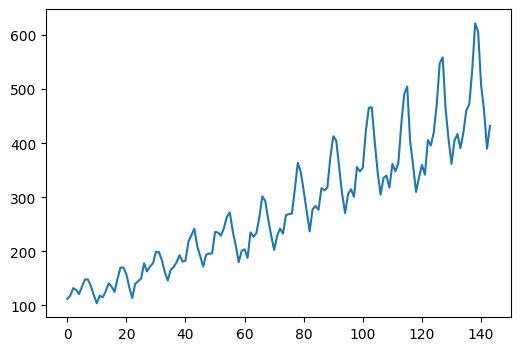

In [44]:
plt.figure(figsize = (6,4))
plt.plot(ap)
plt.show()

 - 시계열 데이터임을 확임 상승 추세, 분산 증가, non-stationary
 - 분산 줄이고 상승 추세 제거

## 2. 분산을 일정하게 만들기 - Log transformation
- log transformation 적용 이유
    - 큰 수를 같은 비율의 작은 수로 만들 수 있음
    - 복잡한 계산을 쉽게 만듦
    - 왜도(skewness)와 첨도(kurtosis)를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위한 것

In [45]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [46]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


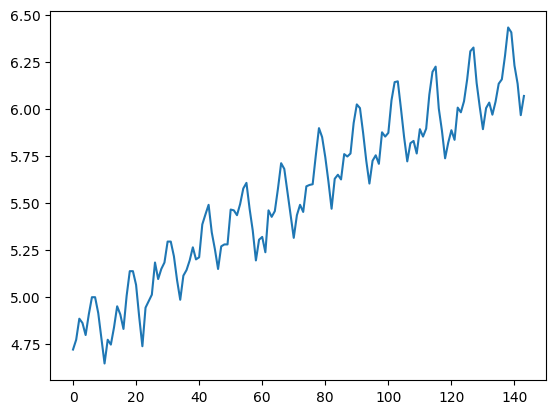

In [47]:
# 분산이 일정해진 것을 눈으로 확인할 수 있습니다.
plt.figure()
plt.plot(log_transformed)
plt.show()

 - 증가하는 분산이 통제됨을 확인, y값도 줄어든 것 확인

## 3. 차분을 통해 추세 제거하기

In [48]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있습니다.
# 차분을 수행하면 data가 짧아지므로 data를 잘라서 쓰거나 Null 값제거하고 사용해야
diffed =log_transformed.diff()
diffed

,#Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


In [49]:
diffed =log_transformed.diff()[1:]

In [50]:
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


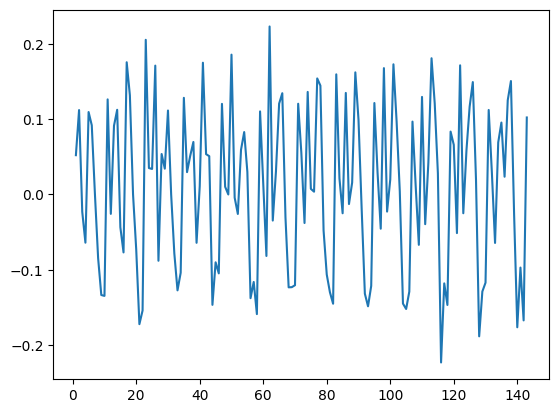

In [51]:
# 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있습니다.
plt.figure()
plt.plot(diffed)
plt.show()

## 4. (추가) 계절 차분을 통해 계절성 제거하기
- AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있음
- 이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있음

In [52]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있습니다.
seasonally_diffed = diffed.diff(12)
# 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 합니다.
seasonally_diffed.dropna(inplace = True)

In [53]:
# 형태를 확인해봅시다.
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


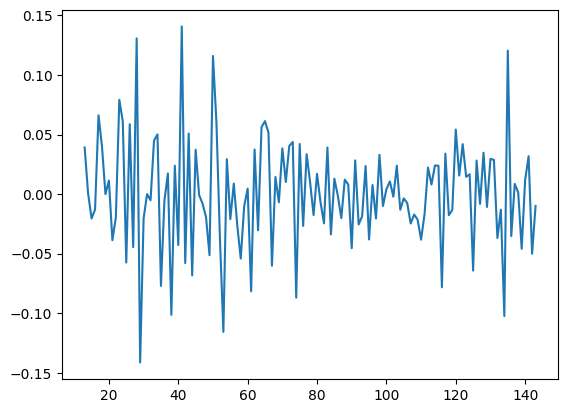

In [54]:
# 아래와 같은 데이터를 얻을 수 있습니다.
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

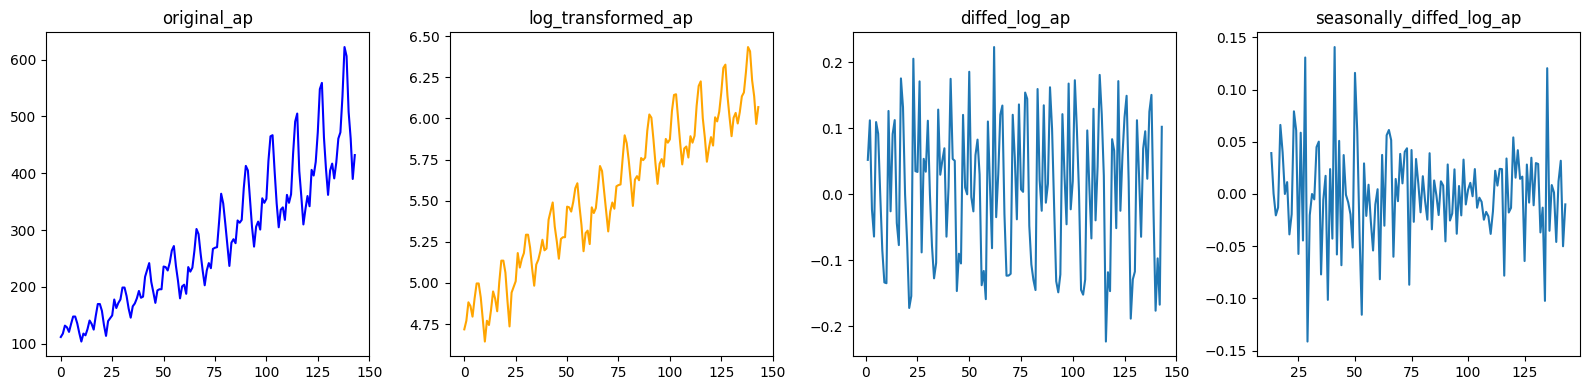

In [55]:
# 비교
fig, axs = plt.subplots(1, 4, figsize = (16,4))

axs[0].plot(ap, color='blue')
axs[0].set_title('original_ap')

axs[1].plot(log_transformed, color='orange')
axs[1].set_title('log_transformed_ap')

axs[2].plot(diffed)
axs[2].set_title('diffed_log_ap')

axs[3].plot(seasonally_diffed)
axs[3].set_title('seasonally_diffed_log_ap')


# 전체 레이아웃 정리
plt.tight_layout()

# 그래프 표시
plt.show()

- 마지막 그래프가 정상성 여부가 애매하다
- 검정을 통해 정상성을 확인해보자

## 5. 검정을 통해 정상성 확인하기

- adfuller : Python에서 statsmodels을 통해 ADF(Augmented Dickey-Fuller) Test를 할 수 있습니다. 앞서 Classification report를 통해 Logistic Regression 모델을 검증한 것과 마찬가지로 시계열 데이터를 통계 분석하고 검증할 때 사용합니다. adfuller를 사용하면 대표적으로 다음과 같은 값을 얻을 수 있습니다.
    - adf(단위근 검정, Augmented Dickey Fuller) : 정상성을 확인하기 위한 단위근 검정방법
    - p-value(유의 검정) : 관찰된 데이터가 귀무가설이 맞다면 통계값 1이 실제로 관측된 값 이상일 확률
    - usedlag : 사용된 시차의 수
    - nobs : ADF 회귀 및 임계값 계산에 사용된 관측치의 수
    - critical values(임계값) : 1%, 5% 및 10% 수준에서 테스트 통계에 대한 임계값
    - icbest : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 autolag를 사용하며 이때autolag를 none으로 지정할 수 있는데 none으로 지정하지 않는 경우 최대화된 정보 기준

In [56]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다.
    print('ADF statistics')
    print(stat) # ADF 검정 통계량입니다.
    print('P-value')
    print(p_value) # P-value입니다.

In [57]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행합니다.
adf_test(seasonally_diffed)

ADF statistics
-4.4433249418311425
P-value
0.00024859123113838495


- 유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있음
- 따라서 비정상 시계열을 정상 시계열로 만들었음

## 6. 시계열 분류
- 시계열 분류의 성능을 높여보자
- 강의 때 Logistic Regression을 이용한 시계열 분류가 낮은 score를 보임.
- 앙상블 모델과 더 많은 특징을 활용해서 분류 성능을 높여보자!

In [58]:
# ⑥-1 : 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exection failures 데이터를 불러옵니다.
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [59]:
# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
timeseries # id, time을 제외하고 6개 column의 X변수가 나타납니다.

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [60]:
y # true/false가 제시되어 있습니다.

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [61]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(x,y,test_size=0.3): # 수업 때 보았던 custom split 함수
    
    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)
    
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    
    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()
    X_train = timeseries[~timeseries['id'].isin(id_list)]
    X_test = timeseries[timeseries['id'].isin(id_list)]
    
    return X_train, y_train, X_test, y_test

In [62]:
# ⑥-4 : 데이터셋 나누기
# test set의 비율을 0.25로 지정해주세요.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size =0.25)

### 0) Parameter 

- **MinimalFCParameters** : feature를 최소(minimal)로 하여 계산을 수행. 데이터셋 크기가 큰 경우 모든 feature를 계산하기 전에 설정을 minimal로 변경하여 빠르게 테스트하기 위해 사용.train과 test 데이터셋을 minimal하게 계산한 값으로 변경해줍니다. - 최소의 parameter활용
- **ComprehensiveFCParameters** : 모든 parameter활용 - 계산 비용 높은 caculator 포함 경우 시간 소요 많이 됨
- **EfficientFCParameters** : 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 특징을 생성

In [63]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [64]:
# ⑥-5 : Feature extraction
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.20it/s]


In [65]:
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 16.87it/s]


In [66]:
print(X_train.columns)
print(X_test.columns)

Index(['id', 'time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z'], dtype='object')
Index(['id', 'time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z'], dtype='object')


In [67]:
comprehensive_features_test = comprehensive_features_test[comprehensive_features_train.columns]

- Null 값 있는 경우 학습에 영향이 있으므로
- impute를 통해 간단히 데이터를 전처리

In [68]:
# ⑥-6 : impute
impute(comprehensive_features_train)

/home/estherj/myenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
6,1.0,0.0,0.0,1.0,890.0,52946.0,3.571429,0.142857,-0.076923,60.0,...,1.494175,1.667462,1.906155,1.697734,2.369382,2.397895,2.302585,2.197225,0.0,3.000000
7,1.0,0.0,0.0,1.0,882.0,52274.0,6.428571,0.571429,-0.384615,57.0,...,1.213008,1.213008,1.906155,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,1.714286
8,1.0,0.0,0.0,1.0,887.0,52737.0,4.857143,-0.857143,0.538462,60.0,...,1.073543,1.386294,1.906155,1.671595,2.369382,2.397895,2.302585,2.197225,0.0,1.571429
9,1.0,0.0,0.0,1.0,880.0,51870.0,3.785714,-0.071429,-0.230769,58.0,...,1.494175,1.667462,2.079442,1.377820,2.138333,2.397895,2.302585,2.197225,0.0,2.571429
10,0.0,1.0,0.0,1.0,946.0,59668.0,0.500000,0.071429,0.076923,63.0,...,0.735622,0.735622,0.735622,0.535961,0.836988,1.159589,1.227529,1.303092,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,0.0,-10671.0,8870205.0,65.428571,-50.285714,1.692308,-912.0,...,0.735622,1.073543,1.386294,0.898137,1.126929,1.366711,1.609438,1.831020,0.0,71.428571
85,1.0,0.0,0.0,1.0,423.0,15083.0,5.285714,-3.428571,0.153846,32.0,...,1.386294,1.386294,2.079442,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,12.142857
86,1.0,0.0,0.0,0.0,-2216.0,548520.0,28.500000,-28.357143,-2.000000,-110.0,...,0.376770,0.376770,1.255482,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,47.714286
87,1.0,0.0,0.0,1.0,-14137.0,13953821.0,54.857143,-39.285714,3.076923,-1036.0,...,1.073543,1.073543,1.386294,1.090599,1.539654,1.972247,2.163956,2.197225,0.0,157.285714


In [69]:
impute(comprehensive_features_test)

/home/estherj/myenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,0.0,1.0,938.0,58678.0,1.214286,0.071429,0.192308,63.0,...,0.562335,0.735622,1.213008,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,1.000000
2,1.0,0.0,0.0,1.0,932.0,58190.0,5.571429,-0.285714,-0.269231,63.0,...,1.255482,1.494175,1.906155,1.697734,2.253858,2.397895,2.302585,2.197225,0.0,3.000000
3,1.0,0.0,0.0,1.0,917.0,56379.0,5.500000,-0.214286,-0.653846,61.0,...,1.320888,1.906155,2.079442,1.697734,2.369382,2.397895,2.302585,2.197225,0.0,2.142857
4,1.0,0.0,1.0,1.0,933.0,58253.0,4.714286,0.285714,-0.076923,63.0,...,1.494175,1.667462,1.906155,1.479133,2.253858,2.271869,2.302585,2.197225,0.0,2.428571
5,1.0,0.0,1.0,1.0,909.0,55437.0,5.857143,-0.571429,0.269231,59.0,...,1.320888,1.494175,1.906155,1.479133,2.369382,2.397895,2.302585,2.197225,0.0,2.285714
19,1.0,0.0,0.0,1.0,930.0,58452.0,8.071429,-1.071429,1.307692,62.0,...,1.073543,1.494175,1.906155,1.412745,1.979205,2.145842,2.302585,2.197225,0.0,17.142857
20,1.0,0.0,0.0,1.0,975.0,67045.0,10.071429,-3.785714,1.961538,61.0,...,0.735622,0.735622,1.255482,1.585771,2.138333,2.397895,2.302585,2.197225,0.0,18.142857
21,1.0,0.0,0.0,1.0,988.0,72912.0,22.571429,1.285714,-3.884615,64.0,...,1.494175,1.494175,1.906155,1.626021,2.253858,2.397895,2.302585,2.197225,0.0,12.857143
22,1.0,0.0,0.0,1.0,936.0,59376.0,9.571429,-1.857143,0.961538,60.0,...,0.735622,1.073543,1.386294,1.438883,1.820076,2.019815,2.163956,2.197225,0.0,20.285714
23,1.0,0.0,0.0,1.0,910.0,56466.0,6.571429,1.857143,-0.307692,61.0,...,1.073543,1.386294,2.079442,1.671595,2.369382,2.397895,2.302585,2.197225,0.0,7.571429


### 1) Logistic Regression

In [70]:
# Logistic Regression 사용 및 score 확인
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic = LogisticRegression() 
logistic.fit(comprehensive_features_train, y_train)

LogisticRegression()

In [71]:
logistic.score(comprehensive_features_test, y_test)

0.5714285714285714

### 2) RandomForest


In [72]:
# ⑥-7 : RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [73]:
# test셋에 적용
rf_clf.score(comprehensive_features_test, y_test)

0.8571428571428571

- test셋에 적합해본 결과 약 0.57, 0.86 정확도를 보임

### 3) XGBoost

In [74]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

# XGBoost 모델을 학습시킵니다.
xgb_clf.fit(comprehensive_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
# XGBoost 모델의 score를 확인합니다.
xgb_clf.score(comprehensive_features_test, y_test)

0.8095238095238095

### 4) plot_importance 확인 및 시각화

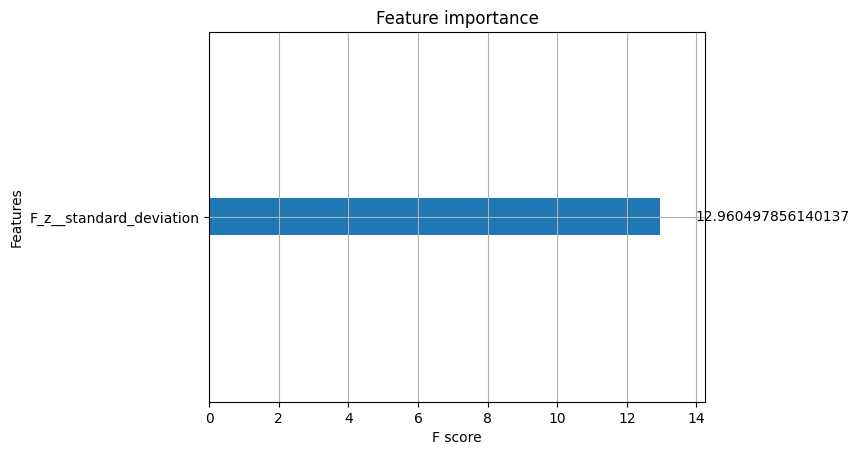

In [76]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인합니다.
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [77]:
sum(xgb_clf.feature_importances_ != 0) # Fx 값의 abs_energy 특징만의 유의미함

1

- 결국 고장 유무를 판별하는 기준은 F_X_abs_energy라는 특징 하나

### 5) Classification report를 통한 검증 및 분석

In [78]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 16.0},
 'false': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5.0},
 'accuracy': 0.8095238095238095,
 'macro avg': {'precision': 0.7777777777777778,
  'recall': 0.875,
  'f1-score': 0.7857142857142857,
  'support': 21.0},
 'weighted avg': {'precision': 0.8941798941798942,
  'recall': 0.8095238095238095,
  'f1-score': 0.8231292517006802,
  'support': 21.0}}

- Precision: 정밀도, "Positive"라고 예측한 것 중에서 실제로 Positive인 비율 = TP/(TP + FP) =>잘못된 Positive 결과 줄이는 것이 중요한 경우(스팸)
- Recall: 재현율, 실제 "Positive"를 얼마나 잘 찾아냈는지 = TP/(TP + FN) => 모든 Positive 잡아내는 것이 중요한 경우 (암진단)
- F1 score: Precision과 Recall의 조화 평균, 두 값이 균형을 이루는지를 평가 = 2 x ((Precision * Recall)/(Precision + Recall)) => Precision과 Recall 중 무엇이 더 중요한지 모를 때 사용
- Support: 실제 샘플 개수 => Support는 모델 성능의 신뢰성을 판단하는 데 중요, Support가 작은 클래스에서는 성능 지표가 불안정할 수 있음
- Macro Avg: 모든 클래스의 Precision, Recall, F1-Score의 단순 평균. 클래스 간 데이터 불균형이 있어도 동일한 가중치를 부여
- Weighted Avg: 각 클래스의 Precision, Recall, F1-Score에 Support(샘플 개수)로 가중치를 부여한 평균. 데이터 불균형을 고려한 평균 값

# 7. 시계열 분류(2)

- 과적합 가능성으로 더 많은 Feature를 포함할 수 있게 ComprehensiveFCParameters 로 재진행해보고자 함

### 0) Parameter

In [79]:
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = ComprehensiveFCParameters()

In [80]:
#Feature extraction
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.23it/s]


In [81]:
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 16.08it/s]


In [82]:
comprehensive_features_test = comprehensive_features_test[comprehensive_features_train.columns]

In [83]:
#impute
impute(comprehensive_features_train)
impute(comprehensive_features_test)

/home/estherj/myenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
/home/estherj/myenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  w

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


- 4662 -> 4698 크게 차이 있어 보이지는 않음 

## 1) Logistic Regression

In [84]:
# Logistic Regression 사용 및 score 확인
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic = LogisticRegression() 
logistic.fit(comprehensive_features_train, y_train)

LogisticRegression()

In [85]:
logistic.score(comprehensive_features_test, y_test)

0.5714285714285714

## 2) RandomForest

In [86]:
# RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [87]:
# test셋에 적용
rf_clf.score(comprehensive_features_test, y_test)

0.6666666666666666

## 3) XGBoost

In [88]:
# XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

# XGBoost 모델을 학습시킵니다.
xgb_clf.fit(comprehensive_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
# XGBoost 모델의 score를 확인합니다.
xgb_clf.score(comprehensive_features_test, y_test)

1.0

In [90]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0}}

[회고]
- 중간에 학습 수행시 ValueError가 생겨 하기 코드 입력하여 train/test column 순서 맞춰줌. comprehensive_features_test = comprehensive_features_test[comprehensive_features_train.columns]
- Parameter를 다르게 한 것에는 크게 차이가 없었음.
- 이 데이터의 경우 특이하게 XGBoost에서 1.0 학습력을 보이는 것으로 판단됨.